In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [11]:
plt.close('all')
num = 12999
run = 2
path = f"/data/logs/2018-06-04-1129-bm-grid-fake-ml-opptime-250/other_noinv_fake/run_{run}/rep00"
logpath = f"{path}/analysis_log_{num}.txt"


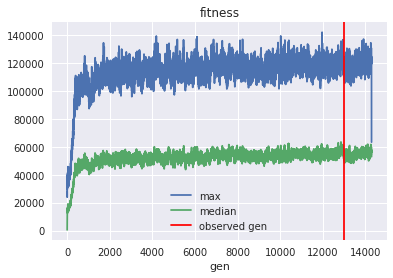

In [12]:
fitpath = f"{path}/fitnesslog.txt"
fig, ax = plt.subplots()
fit = pd.read_csv(fitpath, delimiter="\t")
fit.groupby('gen')['fitness'].max().plot(ax=ax, label='max')
fit.groupby('gen')['fitness'].median().plot(ax=ax, label='median')
ax.axvline(num, label="observed gen", color="red")
ax.legend()
ax.set_title('fitness')
plt.show(fig)

In [13]:
df = pd.read_csv(logpath, delimiter="\t")

In [14]:
m = df.groupby(['ind', 'coop'], as_index=False).mean();

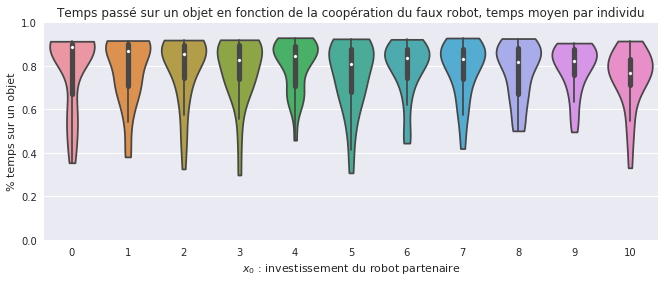

In [15]:
plt.figure(figsize=(11, 4))
sns.violinplot(data=m, x='coop', y='onOpp', cut=0, scale='count')
plt.title("Temps passé sur un objet en fonction de la coopération du faux robot, temps moyen par individu")
plt.ylabel("% temps sur un objet")
plt.ylim(0, 1)
plt.xlabel("$x_0$ : investissement du robot partenaire");

In [16]:
df['totCoop'] = df['coop'] + df['ownCoop']

In [17]:
df['truecoop'] = np.where(df['onOpp'], df['ownCoop'], np.nan)
#df['truecoop'][np.where(np.isnan(df['truecoop']))[0] + 1] = np.nan

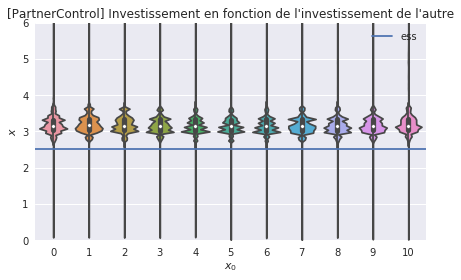

In [18]:
plt.figure(figsize=(7, 4))
sns.violinplot(data=df.query('onOpp == 1'), cut=0, x='coop', y='ownCoop', scale='count')
plt.axhline(2.5, label='ess')
plt.title("[PartnerControl] Investissement en fonction de l'investissement de l'autre")
plt.legend()
plt.ylabel("$x$")
plt.xlabel("$x_0$")
plt.ylim(0, 6);

In [19]:
df['truecoop'] = np.where(df['onOpp'], df['ownCoop'], np.nan)

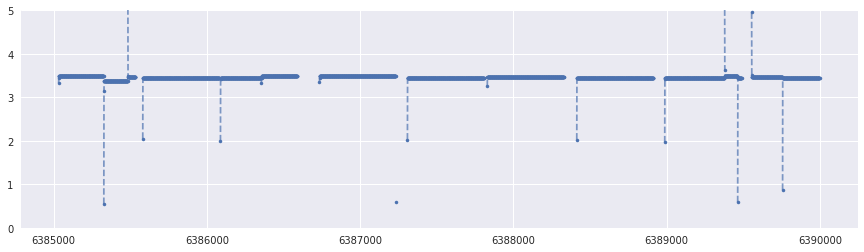

In [20]:
fig, ax = plt.subplots(figsize=(15, 4))
df.query('ind == 23 and coop == 2 and rep == 2')['truecoop'].plot(ax=ax, style='.')
df.query('ind == 23 and coop == 2 and rep == 2')['truecoop'].plot(ax=ax, style='--', alpha=0.7, c=sns.palettes.get_color_cycle()[0])
ax.set_ylim(0, 5)
plt.show()